# Prosjekt 1

I dette prosjektet skal vi se på hvordan monomerer og polymerer oppfører seg i et simulert system der de vekselvirker med hverandre. I første omgang ser vi på enkelte monomerer, enkle kjemiske forbindelser, i en vilkårlig løsning. Vi skal se at disse monomerene evner å sette seg sammen til lengre kjeder, polymerer, som igjen danner grunnlag for blant annet utviklingen av liv slik vi kjenner det i dag!
For å simulere hvordan de samhandler tar vi i bruk algoritmen med navn Monte Carlo Metropolis, den mest brukte Markovkjede Monte-Carlo-funksjonen. Funksjonen bruker mye tilfeldighet, men håndterer det på en slik måte at de mest sannsynlige utfallene bedre blir representert.

Simuleringene vi skal foreta er en helt grunnleggende måte å se hvordan forbindelsene samhandler på. Parameterne vi skal ta hensyn til, som temperatur, ladning og størrelse er bare et lite utvalg av en haug med betingelser som bestemmer interaksjonene i virkeligheten. Men selv om simuleringen er forholdsvis simpel, skal vi se at de viktigste konseptene bak dannelsen av større, mer kompliserte kjemiske forbindelser fortsatt vises gjennom slike enkle simuleringer.

## Oppgave 1

Vi starter med å importere relevante bibliotek:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random as rn
import copy
from tempfile import TemporaryFile as tf
from numba import jit
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

# Remove annoying deprecation warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

For å se nærmere på de aller enkleste vekselvirkningene skal vi plassere $2M$ monomerer på et to-dimensjonalt "spillebrett". $M$ av disse skal ha positiv ladning, og $M$ skal ha negativ ladning. For enkelhetens skyld skal spillebrettet vårt være et nett hvor monomerene blir satt ut tilfeldig. Litt som at en ape plasserer like mange hvite og sorte bønder på et sjakkbrett. Først definerer vi et par konstanter og deretter lager vi selve nettet (i koden vil nett være ekvivalent med det engelske ordet grid).

### Oppgave 1a

In [2]:
e         = 1.6e-19      # [C]
k_B       = 1.38e-23     # [J/K]
epsilon_0 = 8.85e-12     # [F/m]
epsilon_r = 78           # []
a         = (2.3e-5)**2  # [m]
alfa      = (e**2)/(4*np.pi*epsilon_0*epsilon_r*a) #[V^2]

@jit(nopython=True)
def monomer_grid(N,M):   # Lager NxN grid med M tilfeldige plasserte monomerer

    """
    INPUT:
    N:     int, dimensjon på grid (NxN)
    M:     int, antall monomerer med samme ladning
    ---
    Konstruerer 2D NxN numpy-array med 2M tilfeldig plasserte monomerer; M positivt
    ladde og M negativt ladde.
    ---
    OUTPUT:
    grid:  2D array, NxN array med monomerer
    """

    assert M < N*N, "Error: M > N*N, flere monomerer enn punkter i grid."

    grid = np.zeros((N,N), dtype=np.dtype("i2"))
    placed_monomer = -M             # Hvilken monomer som skal plasseres, negativt fortegn for de negative ladningene, vil gi 2M totalt monomerer

    while placed_monomer <= M:

        t1 = rn.randint(0,N-1)
        t2 = rn.randint(0,N-1)

        if placed_monomer == 0:     # For at ingen monomer skal ha verdi 0, 2M monomerer med verdi fra -M til M utenom 0
            placed_monomer += 1

        elif grid[t1,t2] == 0:      # Sjekker om feltet er tomt
            grid[t1,t2] = placed_monomer
            placed_monomer += 1     # Gjør klar til å plassere neste monomer

    return grid

In [3]:
N_monomer = 20           # Grid av størrelsen NxN
M_monomer = 20           # Antall monomerer

eksempel_grid = monomer_grid(N_monomer, M_monomer)

outfile_1a = tf()
np.savez(outfile_1a, eksempel_grid)
_ = outfile_1a.seek(0)

Vi har nå laget en funksjon som tar inn størrelsen på nettet, og hvor mange monomerer vi ønsker å involvere. Det vi trenger nå er en funksjon som lar oss visualisere dette, og derfor skal vi bruke `plt.pcolormesh`. Denne funksjonen tar inn et $N\times M$ array $\big($i vårt tilfelle et $N\times N$ array$\big)$ og to akser $\big($to stk $N\times 1$ på arrayform$\big)$.

### Oppgave 1b

In [4]:
def placeholder(grid, x_ax, y_ax, *args, **kwargs):   # Benytter args og kwargs så vi slipper å putte inn noe som helst om vi ikke ønsker det
    
    """
    INPUT:
    grid:     2D array, et grid med tallverdiene til mono-/polymerene, som skal plottes
    x_ax:     1D array, et array med x-koordinatene
    y_ax:     1D array, et array med y-koordinatene
    *args:    string, enten ingenting eller "monomer", s.a. man kan veksle mellom polymer- og monomerplotting
    **kwargs: keyword arguments, nøkkelord slik at man kan legge til aksetitler og tittel
    ---
    Funksjonen tar inn 3 arrays og plotter dette med matplotlib.pyplots funksjon pcolormesh. Vi bruker .gca() for å redigere aksene slik at det kun vises heltall
    ---
    OUTPUT:
    pcolormesh plot: plot, et plot for å visualisere hvor monomerene/polymerene befinner seg
    """
    
    ax = plt.figure(figsize=(10, 8)).gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    for key, value in kwargs.items():      # Itererer over kwargs om vi ønsker aksetitteler eller tittel
        if key == "x_label":
            plt.xlabel(value)
        if key == "y_label":
            plt.ylabel(value)
        if key == "title":
            plt.title(value)
    for arg in args:                       # Bruker args for å presisere om vi skal plotte som monomerer eller polymerer
        if arg == "monomer":
            axes = ax.pcolormesh(x_ax,y_ax,grid,cmap = 'winter', vmax=1, vmin=-1, shading='auto')
        else:
            return "Invalid args"
    if len(args) == 0:
            axes = ax.pcolormesh(x_ax,y_ax,grid,cmap = 'seismic', vmax=10, vmin=-10, shading='auto')
    plt.colorbar(axes, ax=ax)

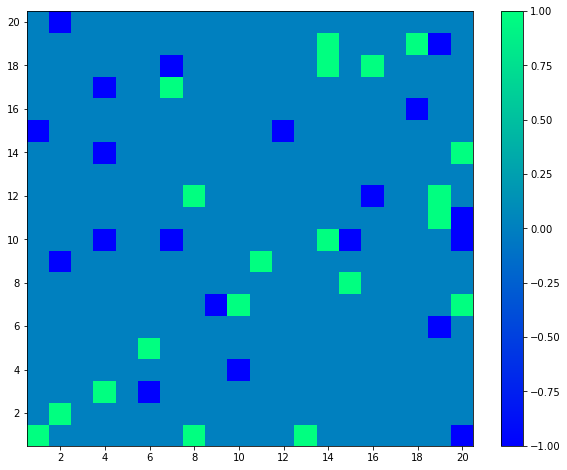

In [5]:
grid_1a = np.load(outfile_1a, allow_pickle=True)
xy_akse_1b = np.arange(1,N_monomer+1,1)

placeholder(grid_1a["arr_0"], xy_akse_1b, xy_akse_1b, "monomer")

Hvert av monomerene har et unikt tall fra $-M$ til $M$ (utenom $0$ som er reservert for løsningen). Dette er nyttig i senere oppgaver, men ikke når det er snakk om visualiseringen. Vi er kun ute etter om tallet er positivt eller negativt, og vi setter derfor ekstremverdiene våre lik $-1$ til $1$ (`vmax=1, vmin=-1`). Figuren overfor viser den tilfeldige plasseringen av monomerene i løsningen.

Det er som tidligere nevt sentralt at monomerene, og senere også polymerene, vekselvirker med hverandre for å kunne skape en struktur som senker systemets potensielle energi så mye som mulig (naturen er fiffig på den måten). For å gjøre dette må vi definere den potensielle energien og hvordan vi skal måle denne.

Vi gjør en tilnærming av den potensielle energien og definerer noe som heter nærmeste nabo. De fire nærmeste naboene er monomerene som befinner seg enten rett over, under, høyre eller venstre. Det er kun disse monomerene som vil påvirke vår potensielle energi.

Vi sier at:

$
V_{kl} =
 \begin{cases} 
      \omega_k \omega_l \alpha & \textrm{om $r_k$ og $r_l$ er NN} \\
      0 & ellers,
   \end{cases}
\
$

der $\omega_k$ og $\omega_l$ er fortegnet til $\textit{k}$- og $\textit{l}$-monomerets ladning, og $\alpha =  \frac{e^2}{4\pi \epsilon_0 \epsilon_r a}$ er en konstant.

For å finne koordinatene (indeksene) til disse naboene må vi lage en funksjon som sjekker om det er et monomer på de ulike sidene og deretter returnerer hvor disse naboene er.



### Oppgave 1c

In [6]:
@jit(nopython=True)
def naboer(i, j, N):

    """
    INPUT:
    i:     int, indeks i for element av interesse
    j:     int, indeks j for element av interesse
    N:     int, dimensjon av grid
    ---
    Finner de nærmeste naboelementene til et angitt element (i,j) i NxN array
    ---
    OUTPUT:
    Array med 4 nærmeste naboelementer
    """

    coord = []                   # En liste med koordinatene til de fire naboene: naboen over, høyre, under og venstre, i den rekkefølgen.

    if i == N-1:                 # For grafisk nord->sør
        coord.append([0, j])

    else:
        coord.append([i+1, j])

    if j == N-1:                 # For grafisk øst->vest
        coord.append([i, 0])

    else:
        coord.append([i, j+1])

    coord.append([i-1, j])    # For grafisk sør->nord
                              # Numpy klarer å loope tilbake til siste elementet om argumentet er -1

    coord.append([i, j-1])    # For grafisk vest->øst

    return np.array(coord)

En viktig merknad å gjøre seg er at naboen til et monomer helt nord på nettet vil være et annet monomer som befinner seg helt sør. Det samme gjelder respektivt for alle himmelretningene. Det kan sees på som en snodig situasjon, men det er snarere et programmeringstriks for å unngå unødige komplikasjoner. Alle monomerer i systemet vil derfor ha fire naboer selv om monomeren er klint opp i et hjørne.

### Oppgave 1d

Vi kan nå bruke `naboer()` for å beregne den totale potensielle energien ved å definere en funksjon som tar inn et system og gir ut energien i Joule.

In [7]:
@jit(nopython=True)
def system_energi(grid):

    """
    INPUT:
    grid: 2D array, grid med monomerene
    ---
    Funksjonen tar inn en systemmatrise og beregner og returnerer
    verdi for total energi i systemet i Joule
    ---
    OUTPUT:
    E     float, systemets energi
    """

    newgrid = grid.copy()     # Kopiér grid
    E = 0                     # Variabel for total energi i system

    # Finn indekser for alle monomerer og lagre disse i arrays
    mono = np.nonzero(grid)
    i = mono[0]
    j = mono[1]

    # Iterer over antall monomerer
    for k in range(len(i)):

        #Finn naboer til monomer k og lagre indekser i arrays
        nabo = naboer(i[k], j[k], len(newgrid))
        nabo_i = nabo[:, 0]
        nabo_j = nabo[:, 1]

        mono_av_int = newgrid[i[k], j[k]]                         # Variabel med verdi lik monomeren av interesse

        # Iterer over monomerens naboer (alltid 4)
        for n in range(4):
            nabo_av_int = newgrid[nabo_i[n], nabo_j[n]]           # Variabel med verdi lik naboen av interesse

            # Dersom nabo ikke er lik 0 og ikke lik monomer
            # i samme polymer, beregn energi mellom monomerene
            if nabo_av_int != 0:
                E += np.sign(nabo_av_int * mono_av_int)

        newgrid[i[k], j[k]] = 0                                   # Sett monomer av interesse til 0 slik at energi bare beregnes én gang

    E *= alfa                                                     # Konverter til SI; (J)
    return E

print(f"Energien for systemet i Oppgave 1b er {system_energi(grid_1a['arr_0'])} J")

Energien for systemet i Oppgave 1b er -1.6736236744082338e-20 J


### Oppgave 1e

Nå er vi klare til å lage en funksjon som utfører en Monte Carlo simulering ved hjelp av Metropolisalgoritmen. Funksjonen produserer altså et system og gjennomfører tilfeldige, **lovlige** flytt av monomerene for et ønsket antall iterasjoner. Det er kun et lovlig flytt dersom en monomer ikke flyttes opp på et annet, og at et flytt generelt minker systemets totale energi. Men i tillegg, grunnet termiske svingninger, kan en monomer ha en liten sjanse for å flyttes, selv om det ikke minker energien. Grensebetingelsene gjør at monomerer også kan flytte seg "over kanten". I tillegg til å flytte monomerene kan funksjonen også ta målinger av en egenskap av interesse.

In [8]:
def Monte_Carlo_Metropolis(N, M, T, t_start = 1000, t_mål = 100, n = 100, measurement = None):

    """
    INPUT:
    N:           int, dimensjon på grid (NxN)
    M:           int, antall monomer med samme ladning
    T:           int, temperatur til systemet
    t_mål:       int, antall iterasjoner mellom hver måling
    t_start:     int, antall interasjoner før man begynner å ta målinger
    n:           int, antall målinger
    measurement: funksjon, ønsket egenskap
    ---
    Funksjonen tar inn nødvendige verdier og går igjennom "Monte Carlo Metropolis"algoritmen. Deretter returnerer den det nyeste og eldste griddet     sammen med en liste med målte energiverdier
    ---
    OUTPUT:
    grid:        2D array, matrise med plassering av monomerene etter gjennomført "Monte Carlo Metropolis"algoritmen
    oldgrid:     2D array, kopi av den første 'grid'
    E_list:      1D array, inneholder
    """

    xy_axis = np.arange(0,N,1)
    grid = monomer_grid(N, M)
    oldgrid = grid.copy()
    N_iterasjoner = t_start + n * t_mål

    beta = 1/(k_B*T)

    E_i = system_energi(grid)

    if measurement == None:
        measurement_list = np.zeros(n)        # Lager en liste med n 0´ere som skal fylles med energi-verdier
        measurement_list[0] = E_i             # Første energi-verdi er energi-verdien for det en første sammensentningen av monomerer
    else:
        measurement_list = np.zeros(n)

    for i in range(N_iterasjoner):

        newgrid = grid.copy()
        mono = np.transpose(np.nonzero(grid))      # Velg tilfeldig monomer
        rand_mono = rn.choice(mono)

        ind_1 = rand_mono[0]                       # Indeks-koordinater for tilfeldig valgt monomer (i, j)
        ind_2 = rand_mono[1]

        nabo_koord = naboer(ind_1, ind_2, N)                  # Henter naboene
        rand_retning = rn.randint(0, 3)                       # Velger tilfeldig retning
        rand_nabo = nabo_koord[rand_retning]                  # Velger tilfeldig nabo basert på retningen

        if newgrid[rand_nabo[0],rand_nabo[1]] == 0:                         # Sjekker om det ikke allerede er et monomer på valgt naboplass
            newgrid[rand_nabo[0],rand_nabo[1]] = newgrid[ind_1,ind_2]       # Kopierer monomeren til naboplassen
            newgrid[ind_1,ind_2] = 0                                        # Setter den originale monomerens verdi lik 0, konklusjon: "flytter" monomeren

            E_f = system_energi(newgrid)                      # Sjekker energi for systemet etter flytt

            if E_f - E_i < 0:                                 # Må være oppfylt for lovlig flytt
                grid = newgrid.copy()
                E_i = E_f

            elif rn.random() < np.exp(-beta*(E_f - E_i)):     # Liten sanns. for "ulovlig" flytt grunnet termiske svingninger
                grid = newgrid.copy()
                E_i = E_f

        if measurement == None and (i-t_start)%t_mål == 0 and i-t_start >= 0:         # Listen med energier inneholder bare de punktene vi ønsker fra n
            measurement_list[(i-t_start)//t_mål] = E_i                                # Fyller listen med energier

        elif (i-t_start)%t_mål == 0 and i-t_start >= 0:                               # Dersom en annen parameter for measurement er satt inn
            measurement_list[(i-t_start)//t_mål] = measurement(newgrid)               # vil listen fylles med denne, f.eks. d_mean

    return grid, oldgrid, measurement_list

Funksjonen gir oss tilbake enten den siste konfigurasjonen av systemet etter ønsket antall iterasjoner, eller en verdi for den gjennomsnittlige størrelsen til såkalte grupper (clusters, som vi skal jobbe videre med i senere oppgaver). Enn så lenge er vi kun interesserte i førstnevnte. Vi ønsker å teste denne Metropolisalgoritmen og kjører derfor to tester, ved temperatur lik $200 K$ og $500 K$.

### Oppgave 1f

In [9]:
N_s_1f = 30000
N_1f = 15
M_1f = 25
T_1_1f, T_2_1f = 200, 500

grid1, oldgrid1, E1 = Monte_Carlo_Metropolis(N_1f, M_1f, T_1_1f, t_start = 0, t_mål = 1, n = N_s_1f)     # Simulering 1
grid2, oldgrid2, E2 = Monte_Carlo_Metropolis(N_1f, M_1f, T_2_1f, t_start = 0, t_mål = 1, n = N_s_1f)     # Simulering 2

In [10]:
outfile_1f = tf()
np.savez(outfile_1f, grid1, oldgrid1, E1)
_ = outfile_1f.seek(0)

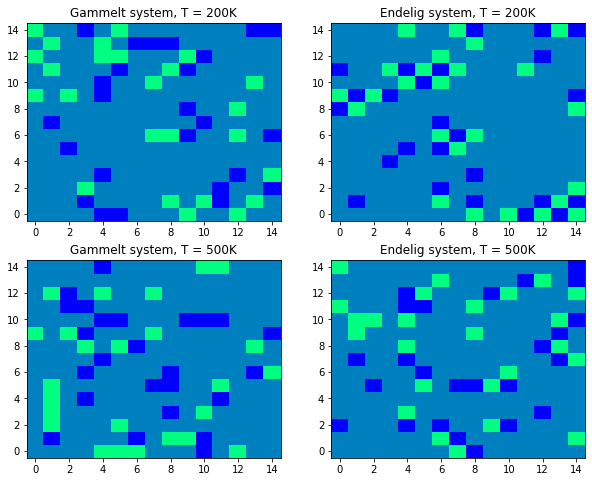

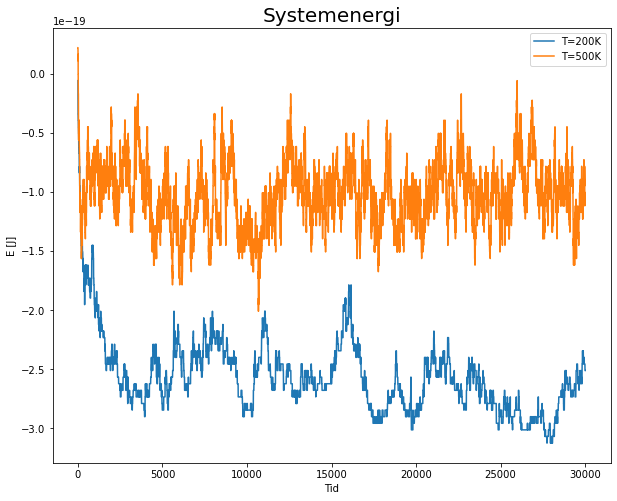

In [11]:
xy_akse_1f = np.arange(0, N_1f, 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))                  # Lager et 2x2 subplot for å plotte grid ved siden av hverandre
axs[0, 0].pcolormesh(xy_akse_1f,xy_akse_1f, oldgrid1, vmax = 1, vmin = -1, cmap = 'winter', shading='auto')
axs[0, 0].set_title('Gammelt system, T = 200K')
axs[0, 1].pcolormesh(xy_akse_1f,xy_akse_1f, grid1, vmax = 1, vmin = -1, cmap = 'winter', shading='auto')
axs[0, 1].set_title('Endelig system, T = 200K')
axs[1, 0].pcolormesh(xy_akse_1f,xy_akse_1f, oldgrid2, vmax = 1, vmin = -1, cmap = 'winter', shading='auto')
axs[1, 0].set_title('Gammelt system, T = 500K')
axs[1, 1].pcolormesh(xy_akse_1f,xy_akse_1f, grid2, vmax = 1, vmin = -1, cmap = 'winter', shading='auto')
axs[1, 1].set_title('Endelig system, T = 500K')

plt.figure(figsize=(10, 8))
plt.title("Systemenergi",fontsize=20)
plt.plot(np.arange(0,len(E1),1),E1,label = 'T=200K')
plt.plot(np.arange(0,len(E2),1),E2,label = 'T=500K')
plt.xlabel('Tid')
plt.ylabel('E [J]')
plt.legend()
plt.show()

Plottet overfor viser systemenes energi over tid for de to temperaturene. Man kan se rimelig raskt at grafene er svært forskjellige. Høyere temperatur når et stadie av svingning om likevektspunktet svært fort, men svingningene er mye større. For lavere temperatur virker det som at et likevektspunkt nås etter langt flere iterasjoner, men at svingningene rundt likevektspunktet er mindre drastiske. Grunnen til dette er at det tar lenger tid for systemet med den lave temperaturen å komme i likevekt, da alt i systemet "går litt treigere". I Metropolisalgoritmen sier vi at om ikke systemets energi minkes ved et monomerflytte skal flyttet kun skje om et tilfeldig tall mellom $0$ og $1$ er mindre enn $e^{-\beta (E_f - E_i)}$, med $\beta = \frac{1}{k_B T}$. Med lav temperatur blir denne sjansen mindre og det vil derfor bli mye flere iterasjoner der det ikke skjer noe.

Visuelt sett vil grafen for den lave temperaturen svinge rundt $-2.7\cdot 10^{-19}J$ fra ca. $15 000$ til $30 000$ iterasjoner. Det er ikke urimelig å anta at dette er likevektspunktet, og at lav temperatur derfor oppnår omtrentlig likevekt allerede ved $5 000$ iterasjoner. For høy temperatur har man en litt annen situasjon. Likevektspunktet ser ut til å være med rundt $-1.0\cdot10^{-19} J$, noe som oppnås nesten med en gang. Senere velger vi flere iterasjoner $t_{equil}$ for å være mer sikker på at likevektspunktet er nådd.

### Oppgave 1g

Vi skal nå se på sammenhengen mellom temperatur og gruppestørrelse. For å visualisere det benytter vi en metode der hver gruppe får ett felles tall. I denne funksjonen kommer vi til å benytte konseptet om nærmeste naboer rimelig hyppig. Som nevnt vil denne ta hensyn til monomerer som er naboer over kantene, og det er derfor ikke uforventet å se at noen grupper strekker seg "rundt" nettet.

In [12]:
def cluster(grid):

    """
    INPUT:
    grid:       2D array (NxN), grid med monomerene vi vil finne ut om kan danne clusters
    ---
    Går over alle monnomerer og deres naboer og gjør alle nærliggende naboer til enn gruppe
    Dvs. at alle grupper har hver sin distinkte tallverdi til slutt
    ---
    OUTPUT:
    newgrid:    2D array (NxN), grid hvor monomerene i et cluster har samme tallverdi
    """

    mono = np.transpose(np.nonzero(grid))             # Finner alle monomerer
    newgrid = grid.copy()

    for x in mono:
        nabo = naboer(x[0], x[1], len(newgrid))       # Finner naboen til gjeldende monomer

        for y in range(3):                            # Setter indeks-koordinater for lettere bruk
            i = nabo[y][0]
            j = nabo[y][1]

            if newgrid[i, j] != newgrid[x[0], x[1]] and newgrid[i, j] != 0:             # Sjekker at naboen selv er et monomer som ikke allerede er "samlet"
                index_naboverdi = np.transpose(np.where(newgrid == newgrid[i, j]))      # Finner indeksene til alle verdiene lik naboverdien
                for u in index_naboverdi:                                               # Itererer gjennom alle indeksene i grid
                    newgrid[u[0],u[1]] = newgrid[x[0], x[1]]                            # Setter alle disse verdiene lik verdien til det valgte monomeret

    return newgrid

Vi har nå skrevet funksjonen og ønsker å teste denne på systemet vi lagret fra **Oppgave 1f**. For å visualisere bruker vi også her et subplot med det originale monomer-systemet og det oppdaterte, grupperte systemet:

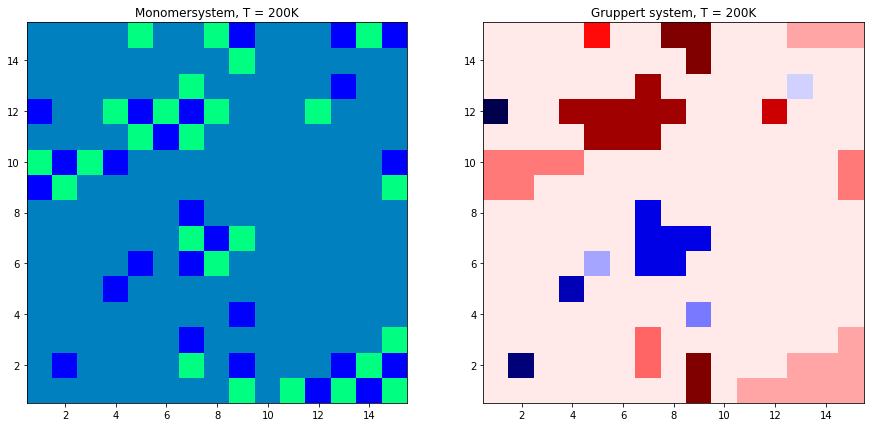

In [13]:
grid_1f = np.load(outfile_1f)
cluster_grid1 = cluster(grid_1f["arr_0"])

xy_ax_1g = np.arange(1,len(grid_1f["arr_0"])+1,1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))         # Lager et 2x1 subplot for å plotte grid ved siden av hverandre
ax1.pcolormesh(xy_ax_1g,xy_ax_1g, grid_1f["arr_0"], vmax = 1, vmin = -1, cmap = 'winter', shading='auto')
ax1.set_title('Monomersystem, T = 200K')
ax2.pcolormesh(xy_ax_1g, xy_ax_1g, cluster_grid1, cmap="seismic",vmin = np.amin(cluster_grid1), vmax = np.amax(cluster_grid1), shading='auto')
ax2.set_title('Gruppert system, T = 200K')
plt.show()

### Oppgave 1h

In [14]:
@jit(nopython=True)
def likevekt(T, t_max = 100000, s = 1/200, C = 10000, T_l = 100):
    """
    Regner ut et konservativt estimat for t_equil; tidssteg før likevekt oppnås.
    """
    return (t_max * np.exp(-s*(T - T_l)) + C)//2


def d_mean(grid):# Regner ut gjennomsnittlig cluster-størrelse
    newgrid = grid.copy()
    vals = np.unique(cluster(newgrid))
    vals = vals[vals != 0]
    mean = .0
    for d in vals:
        mean += len(np.transpose(np.where(cluster(newgrid) == d)))/len(vals)

    return mean

In [15]:
N_1h = 15
M_1h = 25
T_1h = np.linspace(100,1000,12)[1:-1]     # Temperaturene vi ønsker å sjekke for
t_r_1h = 1000
t_max_1h = 100000
s_1h = 1/200
C_1h = 10000

def mean_cluster_size(N, M, T_list, t_r, t_max, s, C):         # Bruker MC-funksjonen for å ta målinger av gruppestørrelse ved likevekt

    d_1h_list = []

    for j in range(len(T_list)):                       # Itererer MC-funksjonen over alle temperaturverdiene mellom 100K og 1000K
        t_equil = int(likevekt(T_list[j]))
        n = (t_max - t_equil)//t_r

        oldgrid_1h1, grid_1h1, d_1h = Monte_Carlo_Metropolis(N, M, T_list[j], t_equil, t_r, n, d_mean)
        d_1h_list.append(np.mean(d_1h))   # Det er foretatt flere målinger for hver temp. ved likevekt, bruker gjennomsnitt av disse.

    return d_1h_list

In [16]:
# For to simuleringer
d_1h_list_sim1 = mean_cluster_size(N_1h, M_1h, T_1h, t_r_1h, t_max_1h, s_1h, C_1h) # Endrer ikke parameterene
d_1h_list_sim2 = mean_cluster_size(N_1h, M_1h, T_1h, t_r_1h, t_max_1h, s_1h, C_1h) # Startkonfigurasjonen av monomerer vil være forskjellige

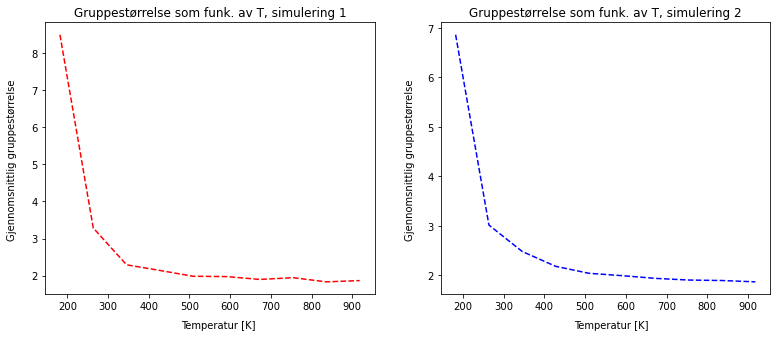

In [17]:
fig, axs = plt.subplots(1, 2,figsize = (13,5) )       # Lager et 2x1 subplot for å plotte grid ved siden av hverandre
axs[0].plot(T_1h, d_1h_list_sim1, 'r--')
axs[0].set_title('Gruppestørrelse som funk. av T, simulering 1')

axs[1].plot(T_1h, d_1h_list_sim2, 'b--')
axs[1].set_title('Gruppestørrelse som funk. av T, simulering 2')

fig.text(0.73, 0.04, 'Temperatur [K]', ha='center', va='center')
fig.text(0.31, 0.04, 'Temperatur [K]', ha='center', va='center')
fig.text(0.09, 0.5, 'Gjennomsnittlig gruppestørrelse', ha='center', va='center', rotation='vertical')
fig.text(0.515, 0.5, 'Gjennomsnittlig gruppestørrelse', ha='center', va='center', rotation='vertical')
plt.show()

for ax in axs.flat:
    ax.set(xlabel='T [K]', ylabel='Gruppestørrelse')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [18]:
for k in T_1h:
    print("T =", "{:.3f}".format(k) ,f":\t t_equil = {int(likevekt(k))},\t n = {(t_max_1h - int(likevekt(k)))//t_r_1h}")

T = 181.818 :	 t_equil = 38212,	 n = 61
T = 263.636 :	 t_equil = 27061,	 n = 72
T = 345.455 :	 t_equil = 19654,	 n = 80
T = 427.273 :	 t_equil = 14734,	 n = 85
T = 509.091 :	 t_equil = 11466,	 n = 88
T = 590.909 :	 t_equil = 9295,	 n = 90
T = 672.727 :	 t_equil = 7853,	 n = 92
T = 754.545 :	 t_equil = 6895,	 n = 93
T = 836.364 :	 t_equil = 6258,	 n = 93
T = 918.182 :	 t_equil = 5836,	 n = 94


Overfor finner man gruppestørrelse for to simuleringer. $\langle d \rangle$ vil være større for lavere temperaturer fordi monomerene da har en mindre sjanse for å bevege seg unna en gruppe enn monomerer ved høyere temperaturer. Dette ser man tydelig ved at $\beta = \frac{1}{k_B T}$ øker når temperatur minker, noe som igjen gjør at $e^{-\beta (E_f - E_i)}$ minker. Dermed vil det være mindre sannsynlighet for å generere et tilfeldig tall $p\in [0,1)$ som er mindre enn dette, og monomerer i en samling vil oftere forbli i samlingen ved lavere temperaturer.

Dersom man antar at gjennomsnittlig størrelse på monomersamlinger er normalfordelt,

$$\langle d \rangle \sim n(d; \mu, \sigma)$$

og antar at målinger av denne størrelsen foretatt med tilstrekkelig store mellomrom, er $k$ uavhengige stokastiske variabler, vil gjennomsnittet av disse målingene også være normalfordelt;

$$\overline{\langle d \rangle} \sim n\left(\mu, \frac{\sigma}{\sqrt{k}}\right)$$

Standardavviket for $\overline{\langle d \rangle}$ minker altså desto flere målinger for $\langle d \rangle$ man har foretatt; stor $k$ gir et mer nøyaktig estimat.

I våre simuleringer er $k = n$ valgt slik at den er så stor som mulig, gitt de oppgitte $t_{max}$, $t_{equil}$ og $t_r$. $n$ er større for høyere temperaturer, da man ved høyere temperaturer fortere begynner å svinge om likevektspunktet og kan begynne å ta målinger; da med større svingninger i forhold til lavere temperaturer. Våre verdier for $n$ varierer dermed mellom $61$ og $94$. Fra $\sqrt{61} = 7.810$ og $\sqrt{94} = 9.695$ ser man at standardavvikene er betraktelig mindre. Vi mener altså at vi har valgt tilstrekkelig store $n$´er.

Man vil se en mer betydelig forskjell i resultater ved lavere temperaturer når man gjør flere simuleringer fordi likevektstilstander er mer avhengige av starttilstander. Dette skyldes at monomerer ved lavere temperaturer har vanskeligere for å forlate en samling, og dermed vil det skje mindre endringer i samlingene når de først begynner å formere seg.

Resultatene fra disse simuleringene er altså som forventet og kan logisk forklares både fysisk og matematisk.

## Oppgave 2

Fra enkeltmonomerene skal vi nå bevege oss over i polymerenes verden. Vi skal se på hvordan de grupperte monomerene, polymerer, samhandler med hverandre - hvordan de beveger seg, både posisjon og form. Vi begynner med et par konstanter, og lager deretter nettet som polymerene skal være på.

In [19]:
a_poly    = (9.1E-5)**2    # [m]
alfa_poly = (e**2)/(4*np.pi*epsilon_0*epsilon_r*a)  # [V^2]

### Oppgave 2a

In [20]:
N_2a = 20  # Størrelse på grid
M_2a = 4  # Antall polymerer
L_2a = 25  # Størrelse på polymerene


def polymer_grid(N, M, L):
    """
    INPUT:
    N: int, størrelsen på ønsket grid
    M: int, ønsket antall monomerer
    L: int, ønsket antall monomerer i hvert polymerer
    ---
    Bygger opp 2M polymerer fra et tilfelig plassert grunnmonomer for hver polymer
    Utvikler en hel polymer om gangen
    ---
    OUTPUT:
    grid: numpy array, et grid med polymerer
    """

    grid = np.zeros((N, N), dtype=np.dtype("i2"))
    placed_poly = -M

    while placed_poly <= M:  # Blir 2M polymerer, samme måte som i oppgave 1a

        t1 = rn.randint(0, N - 1)  # Tilfeldige indekser for å velge grunnmonomeret som polymeren skal vokse frem av
        t2 = rn.randint(0, N - 1)

        if placed_poly == 0:  # For at ingen polymerer skal ha "navn" 0, 2M monomerer med "navn" fra -M til M utenom 0
            placed_poly += 1

        elif grid[t1, t2] == 0:  # Feltet er tomt og grunnmonomeret i polymeren kan legges

            grid[t1, t2] = placed_poly  # Setter grunnmonomeret i hver polymer
            leBigBoy = 1  # Tellervariabel
            
            while leBigBoy < L:
                """
                Algoritme:
                1. Velger et tilfeldig monomer i polymeren
                2. Finner naboer
                3. Velger retning
                4. Plasserer (om det går)
                5. leBigBoy +1
                6. np.where --> loop
                """
                # Velge monomer
                poly_koord_liste = np.transpose(np.where(grid == placed_poly))
                valgt_mono = poly_koord_liste[rn.randint(
                    0,
                    len(poly_koord_liste) - 1)]

                # Finnner naboer og velger retning
                naboer_koord = naboer(valgt_mono[0], valgt_mono[1], N)
                valgt_nabo = naboer_koord[rn.randint(0, len(naboer_koord) - 1)]

                # Plasserer dersom nabofeltet er tomt
                if grid[valgt_nabo[0], valgt_nabo[1]] == 0:
                    grid[valgt_nabo[0], valgt_nabo[1]] = placed_poly

                    leBigBoy += 1

            placed_poly += 1
    return grid

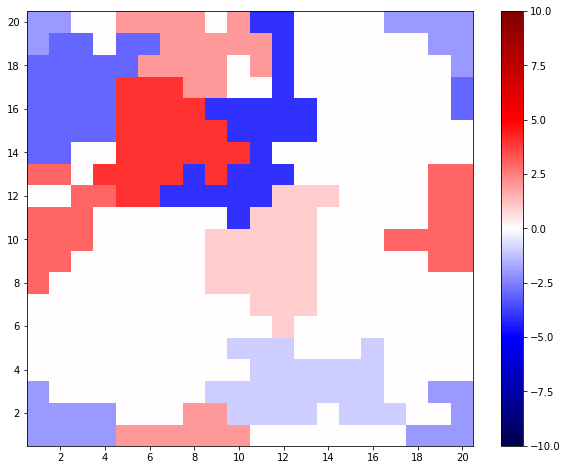

In [21]:
polymergrid_2a = polymer_grid(N_2a, M_2a, L_2a)
xy_akse_2a = np.arange(1, N_2a + 1, 1)
placeholder(polymergrid_2a, xy_akse_2a, xy_akse_2a)

Overfor ser vi et nett med $2M$ plasserte polymerer med $L>20$ altså at hver polymer består av $L$ monomerer.

### Oppgave 2b

Funksjonen vi nå skal skrive skal bruke mange av de samme prinsippene som for energiberegningen i monomersituasjonen, men ekskludere noen bindinger. Innad i polymeren er det ingen vekselvirkning, men som fra forrige situasjon er det slik at monomerbindinger med motsatt fortegn gir senkning i energi og vise versa.

In [22]:
@jit(nopython=True)
def poly_energi(grid):

    """
    INPUT:
    grid: 2D array, grid med polymerene
    ---
    Funksjonen tar inn en systemmatrise og beregner og returnerer
    verdi for total energi i systemet i Joule
    ---
    OUTPUT:
    E     float, systemets energi
    """

    newgrid = grid.copy()     # Kopiér grid
    E = 0                     # Variabel for total energi i system

    # Finn indekser for alle monomerer og lagre disse i arrays
    mono = np.nonzero(grid)
    i = mono[0]
    j = mono[1]

    # Iterer over antall monomerer
    for k in range(len(i)):

        #Finn naboer til monomer k og lagre indekser i arrays
        nabo = naboer(i[k], j[k], len(newgrid))
        nabo_i = nabo[:, 0]
        nabo_j = nabo[:, 1]

        mono_av_int = newgrid[i[k], j[k]]                         # Variabel med verdi lik monomeren av interesse

        # Iterer over monomerens naboer (alltid 4)
        for n in range(4):
            nabo_av_int = newgrid[nabo_i[n], nabo_j[n]]           # Variabel med verdi lik naboen av interesse

            # Dersom nabo ikke er lik 0 og ikke lik monomer
            # i samme polymer, beregn energi mellom monomerene
            if nabo_av_int != 0 and nabo_av_int != mono_av_int:
                E += np.sign(nabo_av_int * mono_av_int)

        newgrid[i[k], j[k]] = 0                                   # Sett monomer av interesse til 0 slik at energi bare beregnes én gang

    E *= alfa_poly                                                # Konverter til SI; (J)
    return E

Det er nærliggende å tenke, da dette er polymerer, at energiendringene kommer til å være noe mer drastiske, særlig når det er snakk om "rigid motion", fordi når to store polymerer ligger inntil hverandre fjerner man flere kantmonomerer av gangen. Samme konsept gjelder når to store polymerer møtes.

### Oppgave 2c

In [23]:
def rigid_move(grid, poly, direction):

    """
    INPUT:
    grid:      2D array, grid med polymerene
    poly:      int, verdien til polymeren vi er interessert i
    direction: int, heltall fra 0 til 3 som beskriver retningen polymeren skal forsøke å bevege seg
    ---
    Funksjonen tar inn et grid med polymerer, tallverdien til det interessante polymeren og retningen vi skal prøve å flytte dette.
    Funksjonen bruker deretter np.roll for å "rulle" polymeren i valgt retning, før det testes om dette er et lovlig trekk.
    ---
    OUTPUT:
    grid:      2D array, grid med polymerene, enten som de var eller flyttet
    """

    newgrid = grid.copy()
    moving_grid = np.where(newgrid == poly, newgrid, 0)         # Grid med kun polymer som skal flyttes
    rest_grid = np.where(newgrid != poly, newgrid, 0)           # Grid uten polymeren som skal flyttes

    # Sjekker retningen valgt polymer skal flyttes
    if direction == 0:
        moving_grid = np.transpose(np.roll(np.transpose(moving_grid),-1, axis=1))
    elif direction == 1:
        moving_grid = np.roll(moving_grid,1, axis=1)
    elif direction == 2:
        moving_grid = np.transpose(np.roll(np.transpose(moving_grid),1, axis=1))
    elif direction == 3:
        moving_grid = np.roll(moving_grid,-1, axis=1)

    # Slår sammen rest-grid med polymer-grid etter det har flyttet
    compare_grid = moving_grid + rest_grid
    compare_poly = np.where(compare_grid == poly, compare_grid, 0)

    # Sammenligner for å sjekke om flyttet er lovlig. Dersom det er det, returner nytt system. Om ikke, returner initielt system
    if (compare_poly == moving_grid).all():
        return compare_grid
    else:
        return grid

For å se på hvordan polymerene samhandler må vi starte med å flytte på dem. Det er flere måter å utføre dette på, og vi starter med den enkleste og minst fleksible. Overfor har vi en funksjon som behandler hver polymer som en puslespillbrikke og flytter det én gang. Å flytte polymeren betyr å flytte alle monomerene det består av i samme retning. Hver polymer kan kun flytte seg langs himmelretningene, altså ikke diagonalt og ikke rotasjon om sin egen akse. Som for monomerer må vi også her sjekke om trekket vi utfører er lovlig. Å flytte monomerene i de ulike polymerene oppå hverandre er ulovlig. Som tidligere er grensebetingelsene slik at en polymer som beveger seg over en kant vil dukke opp på kantens respektive motpart. Det neste nå vil være å simulere hvordan polymerene ender opp etter mange slike trekk.

### Oppgave 2d

In [24]:
def Monte_Carlo_poly(grid, M, T, t_equil, t_r, n, move, measurement = None):
    """
    INPUT:
    grid:                2D array, opprinnelig polymerkonfigurasjon
    M:                   int
    T:                   int,      systemets temperatur
    t_s:                 int,      toalt antall iterasjoner
    t_equil:             int,      antall interasjoner før man begynner å ta målinger
    t_r:                 int,      antall iterasjoner mellom hver måling
    n:                   int,      antall målinger
    move:                funksjon, flytter polymeren
    measurement:         funksjon, ønsket egenskap
    ---
    Utfører "Monte Carlo"prosessen med Metropolisalgoritmen på system med polymerer
    og foretar målinger på systemet av en egenskap av interesse.
    ---
    OUTPUT:
    grid:                2D array, resulterende systemmatrise
    oldgrid:             2D array, initiell systemmatrise
    measurement_list:    1D array, foretatte målinger
    """

    beta = 1/(k_B*T)                                          # Konstant brukt i sannsynlighet for tilfeldig ugunstig flytt
    t_s = t_equil + n * t_r

    #Lager kopier av grid for videre bruk og for å ha original matrise
    newgrid = grid.copy()
    oldgrid = newgrid.copy()
    E_i = poly_energi(newgrid)

    if measurement is None:                                               # Derom measurement er None vil energiene returneres
        measurement_list = np.zeros(t_s+1)                                # Lager et array med t_s 0´ere som skal fylles med energi-verdier
        measurement_list[0] = E_i                                         # Første energi-verdi er energi-verdien for initielt polymersystem
    else:
        measurement_list = np.zeros((n, len(measurement(newgrid))))       # Lager et array med 0-er som skal fylles med målinger

    for i in range(t_s):

        polymer = rn.choice([i for i in range(-M,M+1) if i not in [0]])   # Velger tilfeldig polymer
        retning = rn.randint(0,3)                                         # Velger tilfeldig retning

        newgrid = move(newgrid, polymer, retning)                         # Flytter valgt polymer i valgt retning
        E_f = poly_energi(newgrid)                                        # Beregner energi til nytt system

        # Sjekker om flyttet er lovlig eller skjer tilfeldig. Lagrer nytt system dersom dette er tilfellet, bruker gammelt system ellers
        if E_f - E_i < 0:                                 # Må være oppfylt for lovlig flytt
            grid = newgrid.copy()
            E_i = E_f

        elif rn.random() < np.exp(-beta*(E_f - E_i)):     # Liten sanns. for "ulovlig" flytt grunnet termiske svingninger
            grid = newgrid.copy()
            E_i = E_f

        if (i-t_equil)%t_r == 0 and i-t_equil >= 0 and measurement is not None:     # Dersom en annen parameter for measurement er satt inn
            measurement_list[(i-t_equil)//t_r, :] = measurement(newgrid)            # vil listen fylles med denne, f.eks. d_mean
        elif measurement is None:
            measurement_list[i+1] = E_i

    return grid, oldgrid, measurement_list

In [25]:
N_2d = 15
M_2d = 3
L_2d = 12

# Kjører simulering
grid_2d = polymer_grid(N_2d, M_2d, L_2d)
sys_2d, oldsys_2d, E_list_2d = Monte_Carlo_poly(grid_2d, M_2d, T=200, t_equil=0, t_r=1, n=30000, move=rigid_move, measurement = None)

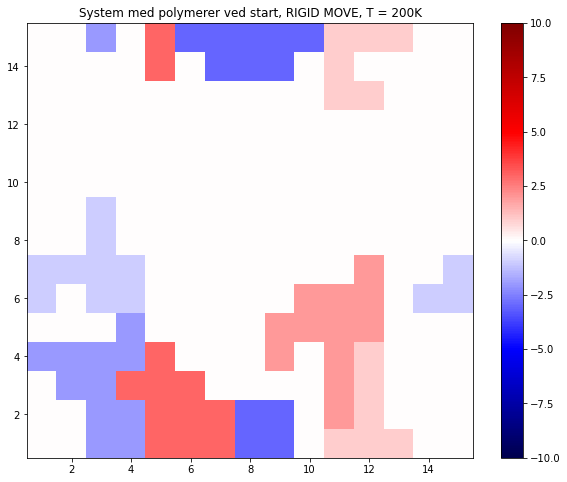

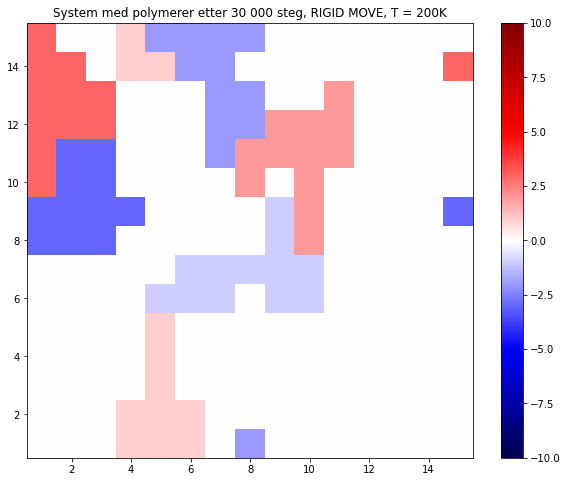

In [26]:
# Konstruerer akser
xy_akse_2d = np.arange(1, N_2d+1, 1)
measure_akse_2d = np.arange(1, len(E_list_2d)+1, 1)

# Visualiserer initielt og resulterende system
placeholder(oldsys_2d, xy_akse_2d, xy_akse_2d, title = "System med polymerer ved start, RIGID MOVE, T = 200K")
placeholder(sys_2d, xy_akse_2d, xy_akse_2d, title = "System med polymerer etter 30 000 steg, RIGID MOVE, T = 200K")

Øverst ser man systemet før noe har blitt flyttet, og figuren under viser systemet etter $30 000$ trekk. Man ser at polymerne kan flytte seg en del rundt i systemet, men de forblir noe samlet. Noen polymerer kan til og med opptre i par hvis de er koblet sammen med motsatt ladning allerede fra starten. De forblir samlet fordi sjansen for at to polymerer trekker fra hverandre dersom de har motsatt ladning er mye mindre enn for monomerer.

At polymerene kun beveger seg med rigid motion gjør at det har færre alternativer når det kommer til bevegelse. På grunn av dette og den lille sannsynligheten for at to polymerer bryter fra hverandre er de mest sannsynlige flyttene et flytt langs andre polymerer. Slike flytt gir ingen energiendring da bindinger erstattes med andre bindinger.

Når vi håndterer polymerer istedenfor monomerer er vi nødt til å kjøre mange flere iterasjoner enn for samme antall monomerer. Dette er fordi en polymer, med rigid motion, beveger seg som ett stort legeme, og er vanskeligere å navigere omkring. Systemet ønsker å minimere energien ved å sette motsatt ladde polymerer mot hverandre, gjerne med flest mulig bindinger, men dette er vanskeligere for polymerer. Monomerer derimot har en annen ulempe: antall. Mens vi i dette polymersystemet bare er nødt til å navigere 6 polymerer inn i en gruppe vil et tilsvarende monomersystem ha 50 monomerer å navigere.

### Oppgave 2e/f

Vi ønsker også å se på hvordan systemet utvikler seg dersom polymerene kan flytte seg på andre måter f.eks. at de kan endre sin egen fasong - såkalt "medium flexibility". For å bevege polymeren slik er vi nødt til å vite om det ødelegges i prosessen, og dette sørger `broken`-funksjonen for at vi unngår. Vi løser derfor **Oppgave 2e** og **Oppgave 2f** samtidig, da vi bruker funksjonene om hverandre.

In [27]:
def broken(grid, poly):

    """
    INPUT:
    grid:       2D array, grid med polymerene
    poly:       int, tallverdien til polymeren vi er interesserte i
    ---
    Gir alle monomerene i polymeren en unik verdi og benytter cluster til å se om polymeren ender opp med kun én verdi
    ---
    OUTPUT:
    True/False: bool, True: polymeren er ikke ødelagt / False: polymeren er ødelagt
    """

    newgrid = grid.copy()                            # Kopierer grid
    polymer = np.where(newgrid == poly,newgrid,0)    # Lager et nytt grid kun med det interessante polymeren
    poly_base = np.transpose(np.nonzero(polymer))    # Henter alle indexene til monomerene i polymeren

    for i in range(len(poly_base)):                  # Itererer over alle monomerene og gir alle en unik verdi
        polymer[poly_base[i,0],poly_base[i,1]] = i+1

    clust = cluster(polymer)                         # Bruker clusterfunksjonen for å gi alle monomerer som henger sammen samme verdi
    
    if len(np.unique(clust)) > 2:                    # Skjekker om antall unike verdier kun er 0 og én annen verdi
        return False                # Ødelagt
    else:
        return True                 # Ikke ødelagt

Denne funksjonen skal fortelle oss om polymeren vi holder på å flytte kommer til å bli ødelagt (altså at det ikke lenger er i samme gruppe) og la oss unngå slike trekk. Funksjonen starter med å gi alle monomerene i polymeren en unik tallverdi, for så å kalle på `cluster`-funksjonen.$\newline$ Om de unike verdiene i det nye nettet er flere enn to (altså flere enn $0$ og et tilfeldig tall for gruppa $\neq 0$) forteller det oss at det er flere enn én gruppe, og derfor at polymeren er ødelagt.

In [28]:
def medium_flex_move(grid, poly, direction):

    """
    INPUT:
    grid:      2D array, grid med polymerene
    poly:      int, tallverdien til polymeren vi er interessert i
    direction: int, retningen vi vil flytte polymeren
    ---
    Funksjonen sjekker om det valgte polymeren kan flyttes, med medium flex, den veien vi ønsker
    ---
    OUTPUT:
    grid:      2D array, grid med polymerene etter funksjonen har flyttet eller ikke
    """

    newgrid = grid.copy()
    moving_grid = np.where(newgrid == poly, newgrid, 0)     # Grid med kun polymer som skal flyttes
    rest_grid = np.where(newgrid != poly, newgrid, 0)       # Grid uten polymeren som skal flyttes


    # Sjekker retningen valgt polymer skal flyttes og foretar flytt
    if direction == 0:
        moved_grid = np.transpose(np.roll(np.transpose(moving_grid),-1, axis=1))
    elif direction == 1:
        moved_grid = np.roll(moving_grid,1, axis=1)
    elif direction == 2:
        moved_grid = np.transpose(np.roll(np.transpose(moving_grid),1, axis=1))
    elif direction == 3:
        moved_grid = np.roll(moving_grid,-1, axis=1)
    
    # Vertikalt flytt
    if direction in [0, 2]:
        compare_grid = moved_grid + rest_grid                               # Slår sammen flyttet polymer og alle andre polymere
        compare_poly = np.where(compare_grid == poly, compare_grid, 0).T    # Lag matrise med kun verdi til ønsket polymer og løsning
        
        # Iterer over rader i compare_poly.T (tilsvarende kolonner for faktisk system)
        for k, rad in enumerate(compare_poly):
            
            # Dersom raden er lik tilsvarende rad rett etter flytt, moved_grid, har ingen kollisjon skjedd og raden flyttes
            if (rad == moved_grid.T[k]).all():
                compare_grid[k] = rad + rest_grid.T[k]
            else:
                compare_grid[k] = newgrid.T[k]                              # Original rad brukes om kollisjon skjer
                
        compare_grid = compare_grid.T                                       # Transponer tilbake

    # Horisontalt flytt
    elif direction in [1, 3]:
        compare_grid = (moved_grid + rest_grid)                             # Slår sammen flyttet polymer og alle andre polymerer
        compare_poly = np.where(compare_grid == poly, compare_grid, 0)      # Lag matrise med kun verdi til ønsket polymer og løsning

        # Iterer over rader i compare_poly
        for k, rad in enumerate(compare_poly):
            
            # Dersom raden er lik tilsvarende rad rett etter flytt, moved_grid, har ingen kollisjon skjedd og raden flyttes
            if (rad == moved_grid[k]).all():
                compare_grid[k] = rad + rest_grid[k]
            else:
                compare_grid[k] = newgrid[k]                                # Original rad brukes om kollisjon skjer
    
    brudd = broken(compare_grid, poly)                                      # Sjekker om polymeren har brutt fra hverandre
    
    # Om polymeren har brutt, returner initielt system, om det ikke har brutt, returner nytt system etter flytt
    if brudd is True:
        return compare_grid
    else:
        return newgrid

Et medium-flex-move fungerer likt som et rigid-move, men vi ønsker at polymeren skal kunne endre struktur for å bedre tilpasse seg formen til en annen polymer ved kontakt. Da går man vekk fra puslespillbrikke-modellen, og behandler hver polymer med en viss fleksibilitet. Med denne type struktur oppstår det mange flere alternativer for bevegelse.

### Oppgave 2g

In [29]:
sys_2g, oldsys_2g, E_list_2g = Monte_Carlo_poly(grid_2d, M_2d, T=200, t_equil=0, t_r=1, n=30000, move=medium_flex_move, measurement = None)

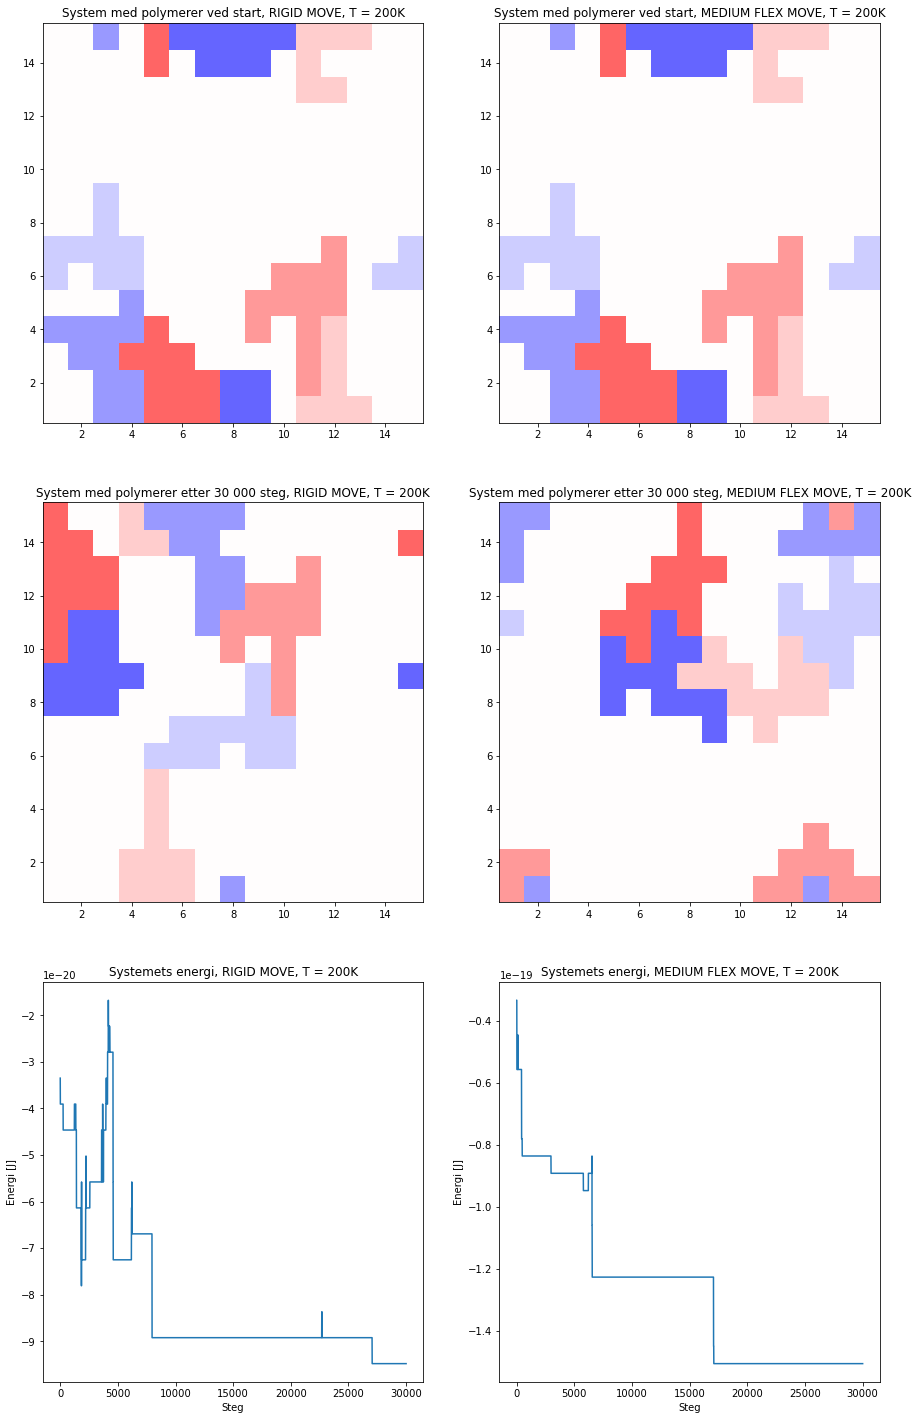

In [30]:
x_2g = np.arange(0, len(E_list_2g), 1)

fig, axs = plt.subplots(3, 2, figsize = (15,25))                          # Lager et 2x3 subplot for å plotte grid ved siden av hverandre
axs[0, 0].pcolormesh(xy_akse_2d,xy_akse_2d, oldsys_2d, vmax = 10, vmin = -10, cmap = 'seismic', shading='auto')
axs[0, 0].set_title('System med polymerer ved start, RIGID MOVE, T = 200K')
axs[1, 0].pcolormesh(xy_akse_2d,xy_akse_2d, sys_2d, vmax = 10, vmin = -10, cmap = 'seismic', shading='auto')
axs[1, 0].set_title('System med polymerer etter 30 000 steg, RIGID MOVE, T = 200K')
axs[0, 1].pcolormesh(xy_akse_2d,xy_akse_2d, oldsys_2g, vmax = 10, vmin = -10, cmap = 'seismic', shading='auto')
axs[0, 1].set_title('System med polymerer ved start, MEDIUM FLEX MOVE, T = 200K')
axs[1, 1].pcolormesh(xy_akse_2d,xy_akse_2d, sys_2g, vmax = 10, vmin = -10, cmap = 'seismic', shading='auto')
axs[1, 1].set_title('System med polymerer etter 30 000 steg, MEDIUM FLEX MOVE, T = 200K')
axs[2, 1].plot(x_2g, E_list_2g)
axs[2, 1].set_title("Systemets energi, MEDIUM FLEX MOVE, T = 200K")
axs[2, 1].set(xlabel='Steg',ylabel='Energi [J]')
axs[2, 0].plot(x_2g, E_list_2d)
axs[2, 0].set_title("Systemets energi, RIGID MOVE, T = 200K")
axs[2, 0].set(xlabel = 'Steg', ylabel = 'Energi [J]')
plt.show()

Her er Monte-Carlo-metoden brukt med både rigid-move og medium-flex-move (venstre og høyre respektivt). Øverst finner vi systemene ved start, og under der igjen hvordan de endte opp. Sammenlignet med en prosess som benytter seg kun av rigid, ser man tydelig at systemet for medium-flex-move ender opp helt annerledes. Tydeligst ser man at det ender opp mer samlet for sistnevnte. Man ser også at en polymer kan ende opp på andre siden av nettet, noe som ellers ikke nødvendigvis hadde vært mulig dersom det bare kunne bevege seg rigid. Der hvor en prosess med rigid-move prøver å senke total energi ved å få puslespillbrikkene til å passe sammen, vil nå flex-polymerene løse samme oppgave ved å i tillegg endre sin egen form ved å presse og strekke seg selv - noe mer nærliggende det som skjer i naturen. Det er derfor ikke uforventet å se at den totale energien er lavere, fordi polymerene kan tilpasse seg hverandre og det er dermed enda flere muligheter for å ytterligere senke energien. Da ser man at polymerenes fysiske form og fleksibilitet, i tillegg til posisjon, er helt essensielt for systemets energi.

### Oppgave 2h

In [31]:
def size_and_num(grid):
    """
    INPUT:
    grid:                       2D array, grid med polymerene våre
    ---
    Funksjonen tar in et grid og måler (gjennomsnittlig cluster-størrelse)/(lengde) og antall clusters,
    deretter returnerer den dette
    ---
    OUTPUT:
    np.array([rel_mean, num]):  1D array, array med målingene våre
    """
    
    L = len(np.where(grid == 1)[0])                              # Finner lengde på polymere
    
    gridvals = np.unique(cluster(grid))                          # Finner alle ulike verdier for grupper i matrisa
    vals = gridvals[gridvals != 0]                               # Fjerner 0 fra array
    
    mean = .0
    
    # Itererer over grupper
    for d in vals:
        mean += len(np.where(cluster(grid) == d)[0])/len(vals)   # Adderer gruppestørrelse delt på antall grupper
    
    rel_mean = mean/L                                            # Gjennomsnittlig gruppestørrelse reativt til polymerlengde
    num = len(vals)                                              # Antall grupper
    return np.array([rel_mean, num])

In [32]:
T_2h = 300
t_r_2h = 1000
N_2h = 30
M_2h = 5
L_2h = np.linspace(3, 39, 13, dtype=np.dtype("i2"))
t_max_2h = 50000
t_equil_2h = 30000
n_2h = 25

measurement_list_2h = np.zeros((len(L_2h), 2))

for k, length in enumerate(L_2h):      # Itererer over L-verdiene
    grid_2h = polymer_grid(N_2h, M_2h, length)
    sys_2h, oldsys_2h, measurement_2h = Monte_Carlo_poly(grid_2h, M_2h, T_2h, t_equil_2h, t_r_2h, n_2h, medium_flex_move, size_and_num)

    measurement_list_2h[k, :] = np.array([np.mean(measurement_2h[:, 0]), np.mean(measurement_2h[:, 1])]) #Tar gjennomsnittet av målingene for d og m for hver L-verdi

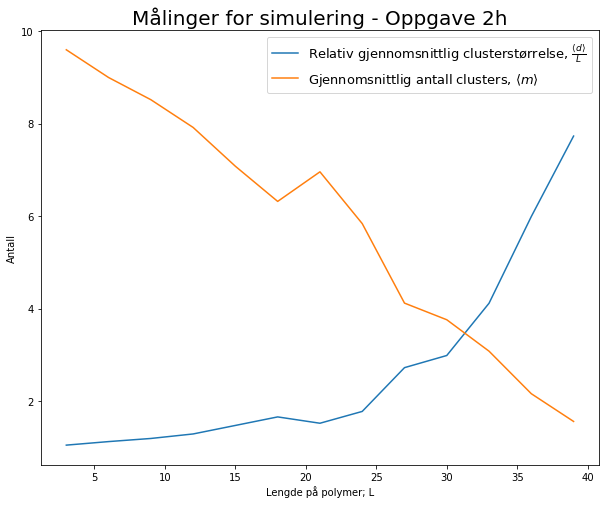

In [37]:
mean_size = measurement_list_2h[:, 0]
amount = measurement_list_2h[:, 1]

plt.figure(figsize=(10, 8))
plt.plot(L_2h, mean_size, label=r"Relativ gjennomsnittlig clusterstørrelse, $\frac{\langle d \rangle }{L}$")
plt.plot(L_2h, amount, label=r"Gjennomsnittlig antall clusters, $\langle m \rangle$")
plt.xlabel("Lengde på polymer; L")
plt.ylabel("Antall")
plt.title("Målinger for simulering - Oppgave 2h", fontsize=20)
plt.legend(prop={'size': 13})
plt.show()

Ut ifra energigrafene for polymersystemer virker det som at systemet kan nå likevekt rundt $20000$ - $25000$ iterasjoner. Vi velger derfor $t_{equil} = 30000$. Med $t_r = 1000$ og $n = 25$, vil $t_s = 55000$ og standardavviket for målingene vil minke med en faktor på $\frac{\sigma}{\sqrt{25}} = \frac{\sigma}{5}$, noe vi anser som et rimelig antall iterasjoner og en tilstrekkelig nøyaktighet.

Selv om både `rigid_move` og `medium_flex_move` vil forsøke å minimere den totale energien i systemet, ser det ut som at `medium_flex_move` gjør dette mer effektivt. Med sistnevnte har polymerene måter å sette seg sammen på som ellers ikke hadde vært mulig med rigid-move; da polymerene kan tilpasse seg hverandres form. En annen egenskap som er eksklusiv for fleksible polymerer er at de kan strekke seg etter flere polymerer. Dersom det er litt avstand mellom to store polymergrupper kan en medium-flex-polymer strekke seg for å nå tak i begge samtidig og dermed koble alle sammen. Dette kan forsåvidt en rigid-polymer også gjøre, men vi tror at det vil ta lengre tid for systemet å finne en puslespillbrikke som "passer". Likevel kan man spekulere på hvor ofte en slik situasjon oppstår, eller om den skjer i det hele tatt. Selv om flex-polymerene kan danne flere bindinger med hverandre, kan fortsatt et system med rigid-move få puslespillbrikkene til å danne like store polymergrupper, uavhengig av om energien er lavere ved medium-flex. På lang sikt kan man konkludere med at endelig gruppestørrelse med de to trekkene ikke vil være så forskjellige. Men dersom man ikke hadde simulert like lenge tror vi at det er litt mer tilfeldig.

Vi forventer at de tilfeldige startposisjonene i simuleringene vil resultere i størst variasjon i resultatene for korte polymerer. Fra systemer med lange polymerer har vi sett at polymerene ofte starter samlet i grupperinger, og grunnet deres mange bindinger vil et brudd fra hverandre være svært usannsynlig. Med korte polymerer vil det være større sjanse for at de starter borte fra hverandre og at de kan bryte ut av grupperinger. Lange polymerer vil likevel variere mye mer i form, men antall grupperinger og størrelse på grupperinger vil nok ikke variere stort.

Til slutt skal vi spekulere litt på hva som ville skjedd med relativ gruppestørrelse og antallet grupper om vi i stedet for å variere lengde $L$ hadde variert nettstørrelse $N$. I små nett er det lite bevegelsesrom og lett å finne en annen polymer å sette seg sammen med, det vil derfor antagelig være tilnærmet én stor gruppe (som ikke nødvendigvis har lav energi). Ved medium nettstørrelse vil det være bevegelsesrom for å finne andre polymerer å gruppere seg med gitt god nok tid, og man vil antagelig ende med én stor, eller et par store grupper. Ved stor nettstørrelse derimot er det ikke sikkert at alle polymerer ville funnet en annen. Det vil kanskje være par med polymerer rundt omkring, men antagelig ikke en stor gruppe.

---

Selv om simuleringene som er gjort for monomerer og polymerer er de aller enkleste beskrivelsene av vekselvirkning mellom kjemiske forbindelser, illustrerer det godt de viktigste konseptene bak dannelsen av mer kompliserte strukturer. Som herre over parameterne får man sett hvor varierte resultater man får, og med tanke på de biologiske prosessene kan man derfor skjønne at det ikke skal store endringer i et par betingelser før det går virkelig galt. Et konkret eksempel vil være polymerdannelsen med for høy temperatur. Selv med den enkleste form for simulering ser man at monomerne da har vanskeligheter for å gruppere seg. Temperatur påvirker tydelig monomerenes evne til å sette seg sammen, noe som er helt essensiell for dannelsen av membranløse organeller. Senere har vi også sett at polymerenes fleksibilitet fører til en mer samlet gruppe, noe man kan se for seg vil være en fordel i naturen. Disse systemene er skjøre i den grad at kun den riktige kombinasjonen av parametere som temperatur, ladning, nettstørrelse og plassering danner slike grupper. Og når dette igjen bare beskriver en liten del av det virkelige bildet, skjønner man fort hvor komplisert det kan bli.